In [1]:
import yaml
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from SimBMVtool import SimBMVtool as sim

path_config = './config_real.yaml'

# Example dataset

You will need to copy the LST Analysis School data, preferably without the index tables (new ones will be created with the correct paths)

`/fefs/aswg/workspace/analysis-school-2024/DL3/Crab/dl3_*.fits`

Use the destination path as input in the configuration file `config_real.yaml`


paths: {'irf': '/fefs/aswg/workspace/marie-sophie.carrasco/projects/analysis/simulation/ressources/size_200_leakage_0.2_gammaness_eff60_ebins_5pdec_diffuse', 'gammapy_catalog': '/fefs/aswg/workspace/marie-sophie.carrasco/projects/dev-github/gammapy-extra/datasets/catalogs/gammacat/gammacat.fits.gz', 'output_dir': '../outputs_dev', 'simulated_obs_dir': '../outputs_dev/datasets', 'save_name_obs': 'crab_school', 'save_name_suffix': 'example'}
data: {'real': True, 'save_path_data': './example_dataset/Crab_Dec_2023', 'run_list': [], 'obs_pattern': 'dl3_LST-1.Run*.fits', 'cos_zenith_bin_edges': [-0.0, 0.25, 0.5, 0.75, 1.0], 'cos_zenith_bin_centers': [0.125, 0.375, 0.625, 0.875]}
simulation: {'n_run': 2, 'livetime': 1200, 'single_pointing': False, 'obs_collection_type': 'n_run_obs_per_wobble', 't_ref': '2024-10-05 23:00:00', 'delay': 1200, 'time_oversampling': 100, 'fov_rotation_error_limit': 1, 'e_min': 0.5, 'e_max': 10}
wobble_1: {'run': 11895, 'seed': 4, 'obs_id': '1'}
wobble_2: {'run': 11

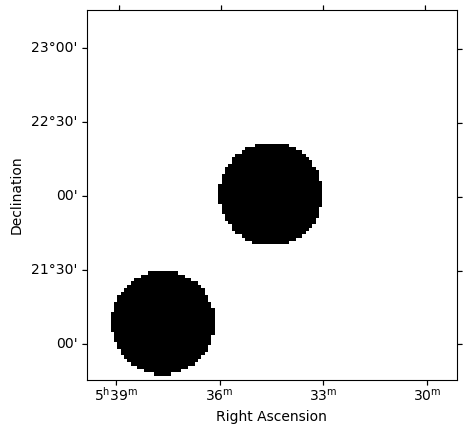

INFO:gammapy.data.data_store:Observations selected: 24 out of 24.


Obs collection loading pattern: _with_bkg_3d_stack_2_circles_Ebins_3_offsetbins_11_offset_max_2.5_exclurad_0.35
Available sources:    OBJECT  
----------
CrabNebula
24 available runs:  [15996 15997 15998 15999 16001 16002 16003 16066 16069 16070 16071 16072
 16073 16074 16075 16173 16174 16177 16178 16179 16180 16181 16182 16183]
All runs selected
Total livetime: 7.6 h


In [2]:
accmodel = sim.BaseSimBMVCreator()
accmodel.init_config(path_config)
accmodel.plot_exclusion_mask()

do_accmodel = True
if do_accmodel: accmodel.do_acceptance_modelisation()
else: 
    accmodel.load_observation_collection(from_index=True)
    accmodel.load_output_background_irfs()

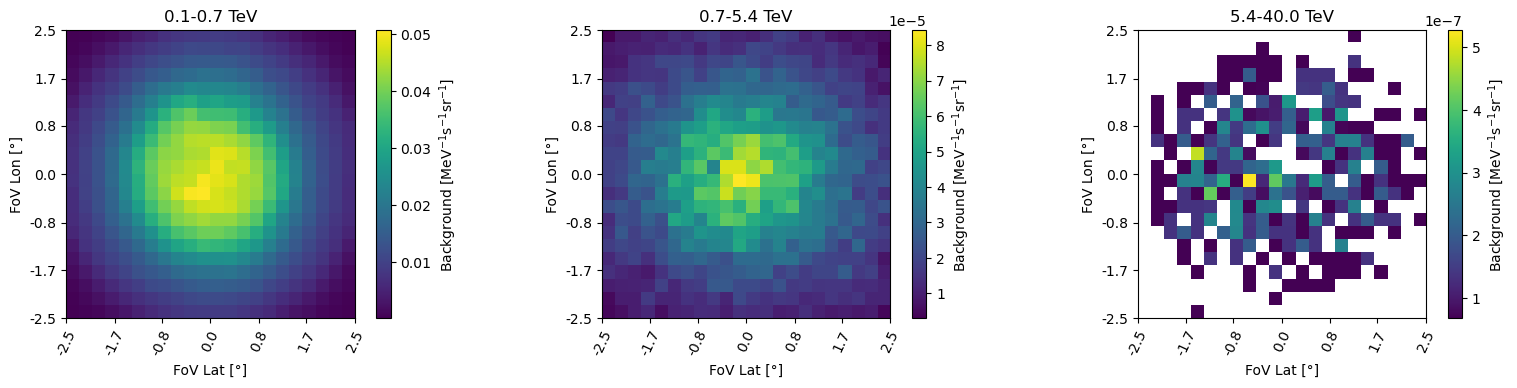

In [4]:
# Plot the model obtained for the 4th run
accmodel.plot_model(data='acceptance',irf='output', i_irf=3)

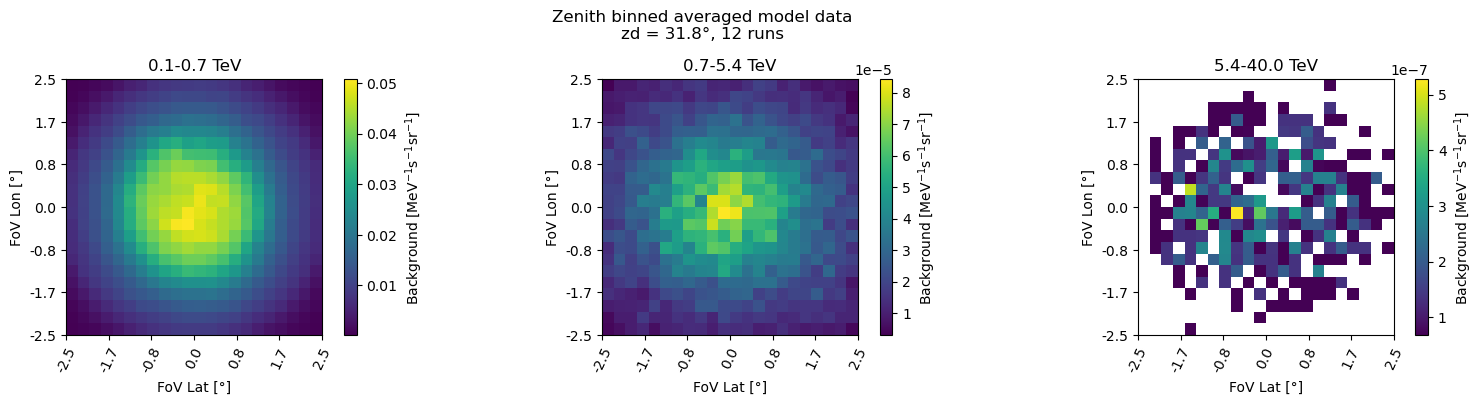

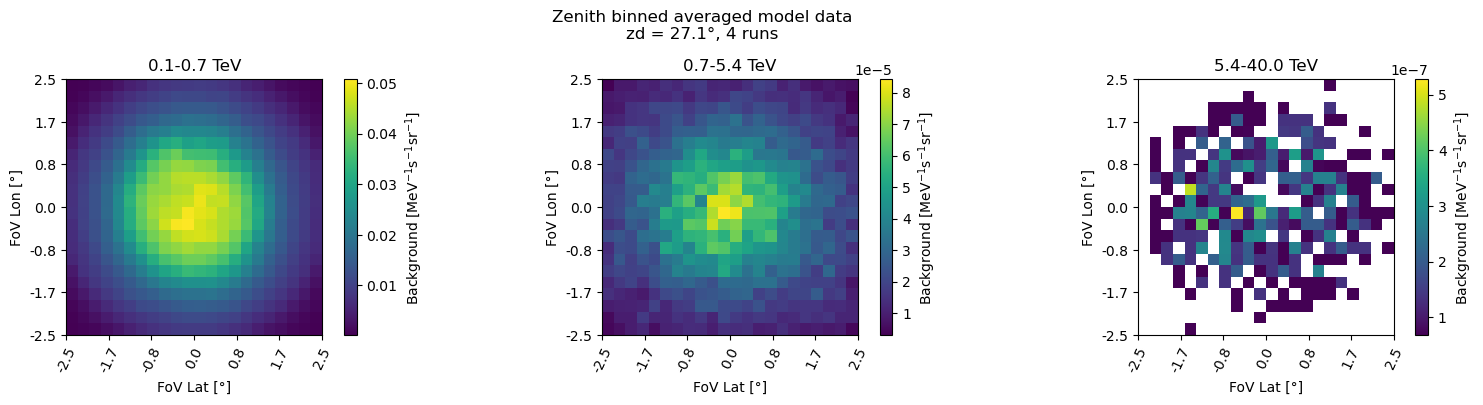

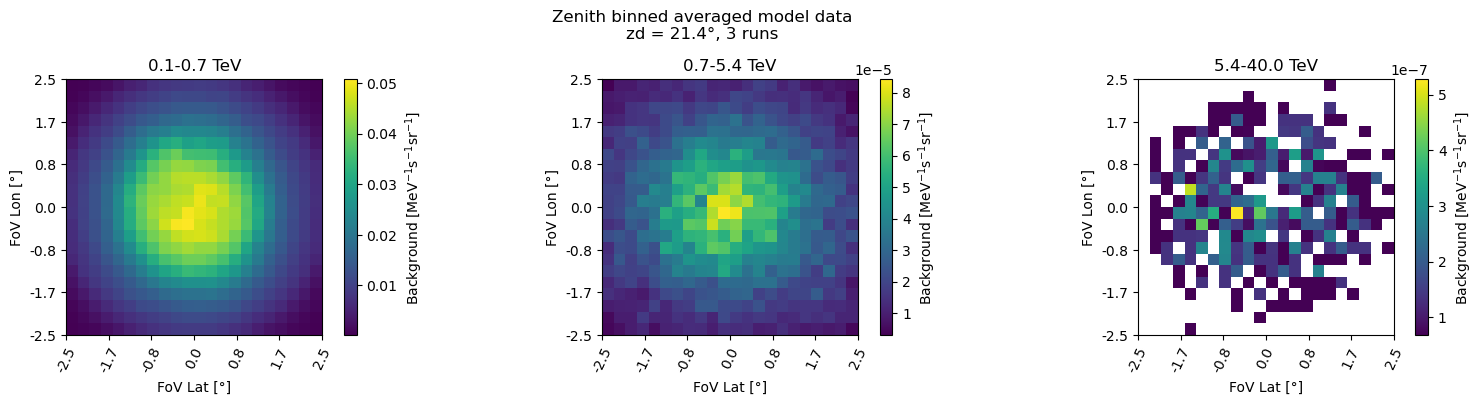

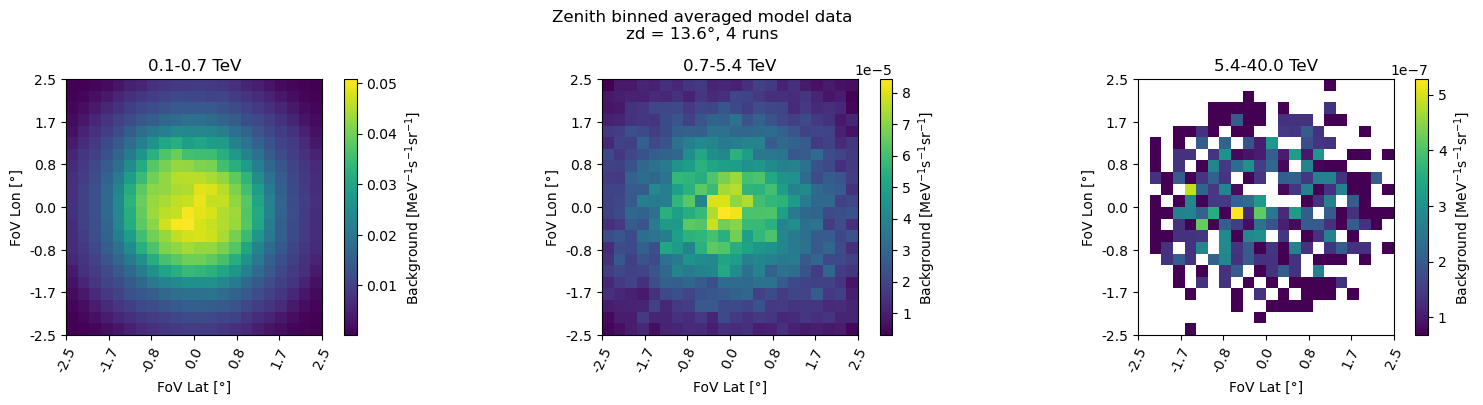

In [4]:
# Create a zenith binned collection of models, with 4 bins by default
accmodel.plot_zenith_binned_model(data='acceptance',irf='output', zenith_bins='auto')

In [6]:
accmodel.create_zenith_binned_collections(collections=['observation'],zenith_bins='auto')
for coszd_bin in accmodel.zenith_binned_obs_collection.keys():
    print(f"zd = {np.rad2deg(np.acos(coszd_bin)):.1f}°: ", accmodel.zenith_binned_obs_collection[coszd_bin].ids)

zd = 31.8°:  ['15997', '15998', '15999', '16066', '16069', '16070', '16071', '16173', '16174', '16177', '16178', '16179']
zd = 27.1°:  ['16001', '16072', '16073', '16180']
zd = 21.4°:  ['16002', '16074', '16181']
zd = 13.6°:  ['16003', '16075', '16182', '16183']


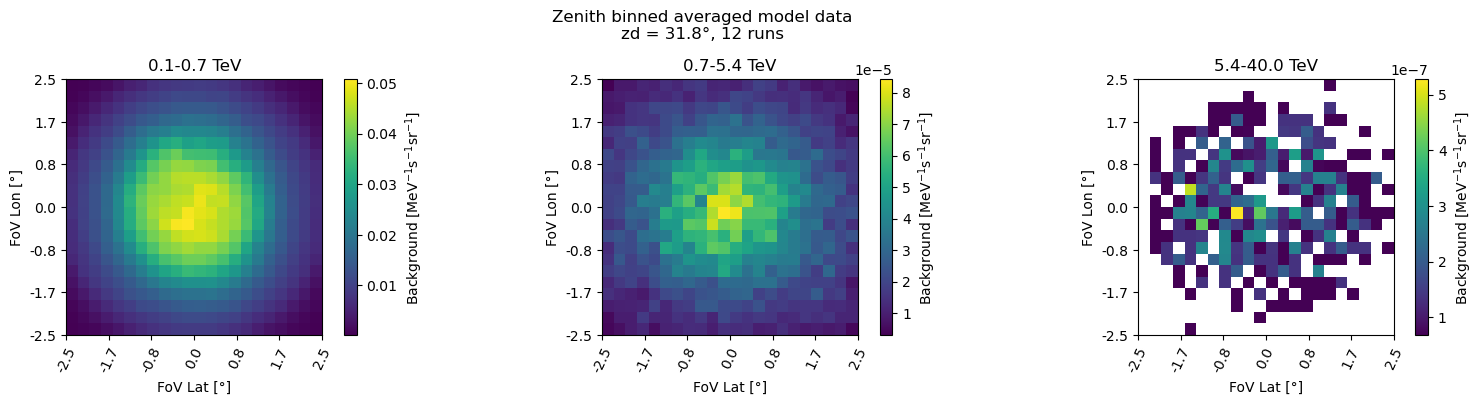

In [7]:
# Plot only one zenith bin
accmodel.plot_zenith_binned_model(data='acceptance',irf='output', i_bin=0)

In [5]:
e_min, e_max = (accmodel.e_min, 1*u.TeV)
offset_max_dataset, offset_max_map = (2.5, 3.)
accmodel.axis_info_dataset = [e_min, e_max, offset_max_dataset * u.deg, accmodel.nbin_offset_irf]
accmodel.axis_info_map = [e_min, e_max, offset_max_map * u.deg, accmodel.nbin_offset_irf]
accmodel.plot_skymaps('ring')

Ring background method is applied


/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/stats/counts_statistic.py:399: RuntimeWarning: invalid value encountered in multiply
  return self.alpha * self.n_off
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/stats/fit_statistics.py:208: RuntimeWarning: invalid value encountered in multiply
  C = alpha * (n_on + n_off) - (1 + alpha) * mu_sig
/fefs/aswg/workspace/marie-sophie.carrasco/miniconda3/envs/SimBMVtool/lib/python3.11/site-packages/gammapy/stats/fit_statistics.py:209: RuntimeWarning: invalid value encountered in multiply
  D = np.sqrt(C**2 + 4 * alpha * (alpha + 1) * n_off * mu_sig)


{'counts': <gammapy.maps.wcs.ndmap.WcsNDMap object at 0x7feb6a3ecf90>, 'background': <gammapy.maps.wcs.ndmap.WcsNDMap object at 0x7feb6854b8d0>, 'significance_all': <gammapy.maps.wcs.ndmap.WcsNDMap object at 0x7feb6a3fedd0>, 'significance_off': <gammapy.maps.wcs.ndmap.WcsNDMap object at 0x7feb683aa450>, 'excess': <gammapy.maps.wcs.ndmap.WcsNDMap object at 0x7feb6a3ef1d0>}


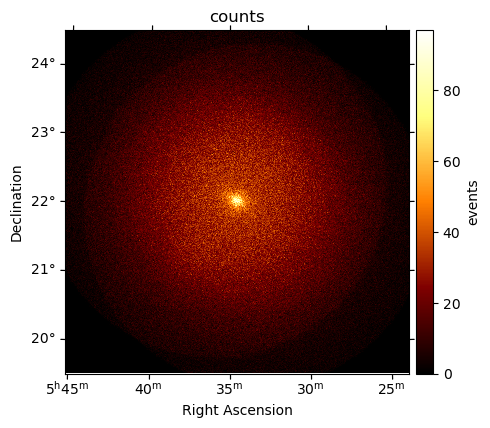

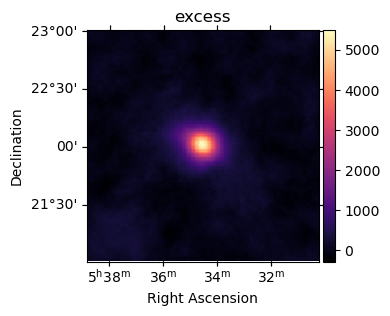

In [ ]:
stacked_dataset = accmodel.get_stacked_dataset(bkg_method='ring', axis_info=accmodel.axis_info_dataset)
skymaps = sim.get_skymaps_dict(stacked_dataset, accmodel.exclude_regions, accmodel.correlation_radius, accmodel.correlate_off, 'all')
print(skymaps)

sim.plot_skymap_from_dict(skymaps, 'counts')

# Crop the map and/or reduce the size of the plot
sim.plot_skymap_from_dict(skymaps, 'excess', crop_width=1*u.deg, figsize=(4,4))